# Analyzing the I-94 Traffic Dataset

The I-94 is a very important traffic route as it leads to many important states and cities such as Chicago, Illanois and Milwaukee, Wisconsin. This also an important road for connecting east and west states of North America. Because of this there tends to be heavy slow-moving traffic.

There is a dataset made by John Hogue, and we are going to explore it to try and determine the few indicators for heavy traffic. This can include stuff such as weather type, time of the day, time of the week and so on.

In [1]:
#importing the important modules

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading in the i_95 interstate data
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


#displays the first 5 rows
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
#displays the last 5 rows
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
#displays information about the structure of the dataset we loaded in
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
#shows the column index
i_94.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [6]:
#allows jupyter to display matplotlib graphs
%matplotlib inline

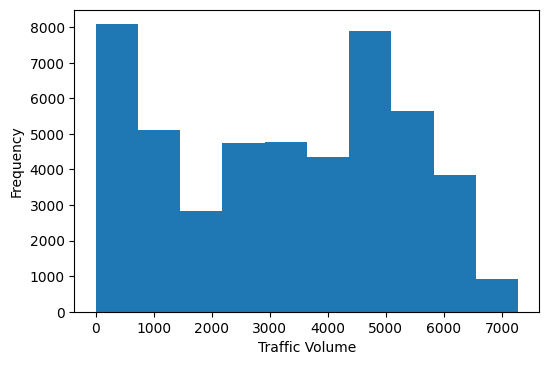

In [7]:
i_94['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [8]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the Histogram we can conclude that the traffic is not symmetrical. Because of this and the two peaks we have, we can say that the distribution is bimodal, meaning there is 2 major factors in deciding the amount of cars passing every hour.

The mathematical description provided for us also supports this idea as the standard deviation is more than half of the mean. The 50th percentile is also so much closer to the 75th than the 25th. 25% of the time there is less than 1200 cars passing through the station, whilst on the other end of the 25% there is more than 5000 being recorded.

The bimodal factors that contribute to this could be night and day times. During the night not many cars pass, but during the day and rush hours there are thousnads of cars being recorded into the data set. Because of this to help perform useful analysis it could be useful to split the data into 'night' and 'day' times.

## Traffic volume: Day vs Night

To start our analysis on whether time is a good indicator of traffic volume, we will divide our dataset into two parts, night and daytime. The criteria of whether it is night or day will be a 12 hour split of the day. The 'day' periods will start from 7 a.m. and last till 7 p.m. whilst night is the remaining 12 hour period.


In [9]:
#converting all the date_time column values to datetime object types
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

#splitting the records into day and night time periods according to our criteria
day = i_94[(i_94['date_time'].dt.hour >=7) & (i_94['date_time'].dt.hour <= 19)]
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]


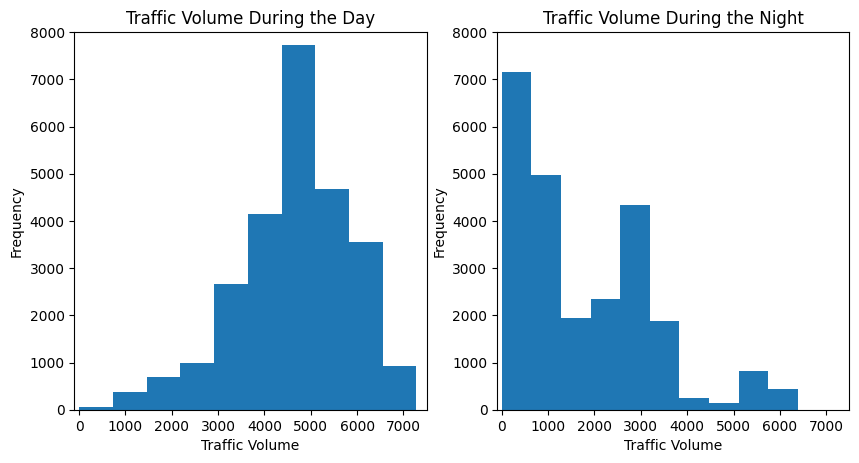

In [10]:
#creates a figure size of 10 inches wide and 5 inches height
plt.figure(figsize=(10,5))


#Creates a histogram of the day time traffic volume
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume During the Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)


#Creates a histogram of the night time traffic volume
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume During the Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

In [11]:
#statistical data on day time traffic volume
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
#statistical data on night time traffic volume
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the shape of the histagrams we can see that there is substantially more heavy traffic during the day. This is also supported when we obtained some statistical information from the two datasets. The traffic volume mean for the day time was around 4700 whilst it was 1800 for night. There was more than a 2.5x increase in volume during the dat than night. 

Because of this and our aim to find oit indicators for heavy traffic, we will discard the night time data values in the night rarely any heavy traffic is produced.


## Time indicators

One possible indicator of heavy traffic is time as there is a strong possibility that more people or on the roads at certain times, for example just before standard working hours. We will now try and look at how traffic volume changes according to the month, day of thee week and the time of day.

In [13]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-13-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

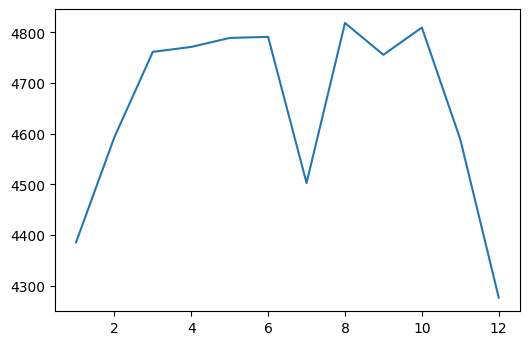

In [14]:
plt.plot(by_month['traffic_volume'])
plt.show()

### Traffic volume by month

The line plot tells us a general story of how traffic volume changes over the year. It genrally tells us us that in colder months November - March, we see that traffic volume is less than the warmer months. This can be for many reasons, such as road closures due to snow or people wanting to travel across states less to stay with family locally. The high traffic volume during the warmer months can be to people getting back to work or leisure trips around America. During July we see an unexpected dip in traffic, this could be due to the summer holidays where people are flying out instead of driving but there could be many more reasons. We will investigate July further to find this out

<ipython-input-15-cefc55872ae2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



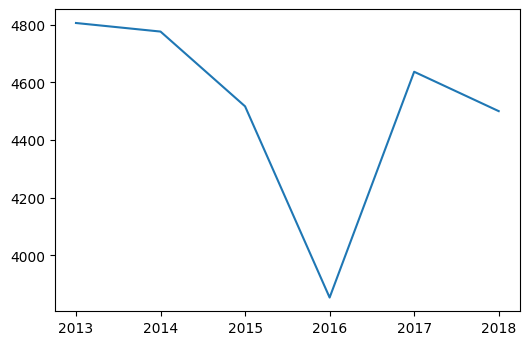

In [15]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
plt.plot(only_july.groupby('year').mean()['traffic_volume'])
plt.show()

As we can see here, July typically does not fall lower in the year and has the same high traffic volume trends as other summer months, however 2016 seems to be different as apporaching this year, volume went down. Upon further investeigation we see how there was roadd works and closure which is responsible for the low traffic volume as people found alternative ways of travel.


### Traffic Volume by Days of the Week


Now we will do the same thing but look at the day of the week, to see if we can uncovre any hidden trends.


In [16]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-16-e4e897828b56>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

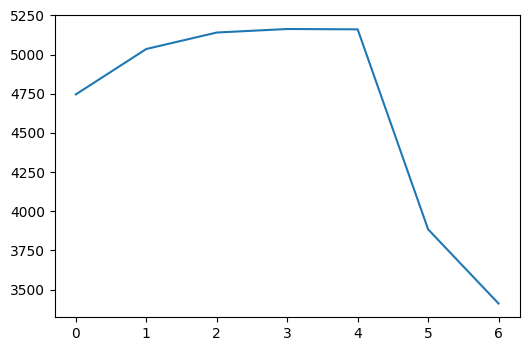

In [17]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

As expected we can see that during the the weekdays where it is essential for people to use the roads to get to and from work, we record a high traffic high volume. Then on the weekends where people are not required to travel normally, we see a very low traffic volume. The highest is friday where we expect of people travelling for work and travelling for leisure and the lowest is sunday where it is not a working week but also a religious day for a mostly religous country so many people will be attending religious ceremonies rather than driving interstate.


### Traffic Volume by hour

Finally we will analyse the movement of traffic flow by the hour. As we have already identified that weekend and weekday traffic are severely different, we will separate the two into two different groups and perform separate analysis.


In [18]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-18-4244afafd4b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



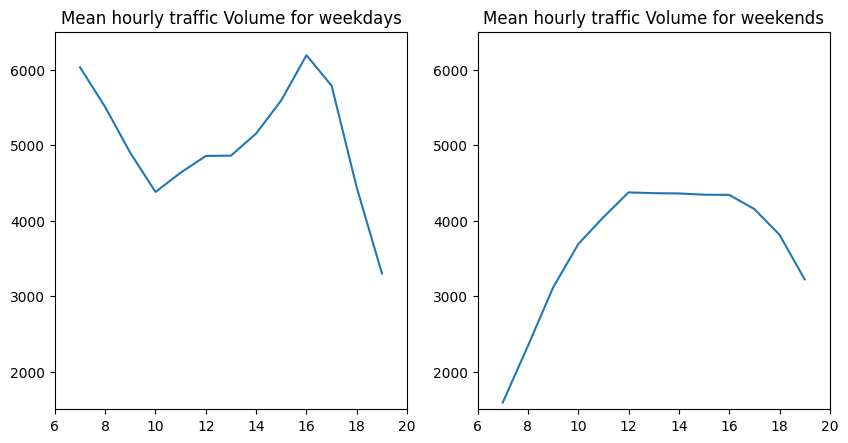

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Mean hourly traffic Volume for weekdays')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Mean hourly traffic Volume for weekends')
plt.xlim(6,20)
plt.ylim(1500,6500)


plt.show()

The results produce expected results. For the weekend the highest amount of cars on the road or 'rush hours' are around 7am and 4pm. These times usually coralate to the times when people are travelling to get on time to work or when people have just finished work. The rush hours for the weekends however are different. The rush hour starts around midday and this typically would be because people are getting laying in and are not typically ready to leave the house until mid day.

To quickly summarise our findings from the three different time indicators, 

- Traffic is heavier during warmer months
- Traffic is busier during the working days
- Traffic is busier on the workdays around 7am and 4pm whilst on weekends it peaks during 12pm



## Weather Indicators

Apart from time affecting how heavy traffic flow can be, we also know the weather conditions can play a major role indeciding when a person travel and how they decided to travel. The dataset provided gives us a lot of useful columns about the weather such as: 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description'.

As these columns are all numerical, except for the last two, lets first look at how each of the columns correlate with each other

In [20]:
day.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
year             -0.000458
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

As we can see here the numeric column that seems to have the strogest correlation with traffic volume is temperature, so we will plot a scatter graph between the two

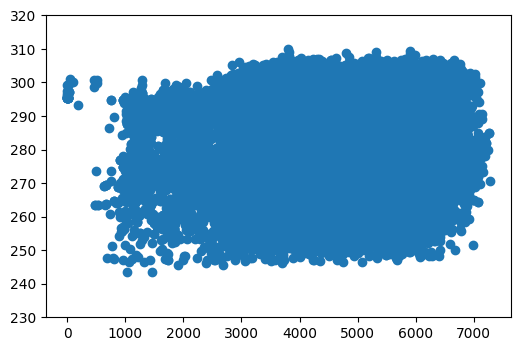

In [21]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

From the scatter plot above its clear to see that temperature, whilst having the strongest correlation to traffic volume doesn't produce a clear insight towards it. It is not a reliable indicator for heavy traffic and as all the other columns produced numbers of lesser significance we can say they are also not good indicators for heavy traffic 


## Weather types

As the numeric columns did provide us with much useful insight, it might do us some good to look at the descriptive columns, 'weather_main'', and 'weather_description'. To do this we are going to calculate the average traffic volume associated with each unique value in the two columns. 

In [25]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_main,,,,,,,,,
Clear,283.884100,0.000000,0.000000,1.676447,4661.666879,6.492107,2015.609791,3.143518,12.958539
Clouds,282.971967,0.000000,0.000000,62.700890,4746.375927,6.391820,2015.321784,2.999894,13.386734
Drizzle,284.432372,0.168234,0.000000,84.781609,4712.699060,7.074190,2015.895507,2.921630,12.825496
Fog,277.378271,0.157739,0.001356,66.281915,4298.933511,6.625000,2015.803191,2.827128,10.648936
Haze,275.726381,0.060947,0.000000,63.916667,4545.434932,5.873288,2015.567352,2.748858,12.780822
Mist,279.342164,0.249371,0.000778,75.518370,4530.901782,6.731175,2015.522372,2.903601,11.527828
Rain,287.172515,3.690371,0.000268,75.771069,4686.953503,6.755247,2015.574104,2.905392,13.167904
Smoke,292.530000,0.810769,0.000000,49.307692,4447.307692,6.846154,2015.846154,2.230769,13.615385
Snow,268.052688,0.013233,0.001648,80.945478,4295.594612,6.375241,2015.489416,2.756895,12.614496


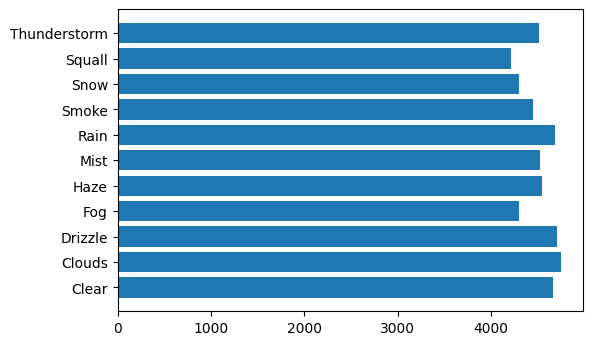

In [30]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.show()

From here we can see that no description of weather here exceeds 5000 cars, and so none of these categories would be considered good indicators. Lets look at weather descriptions instead

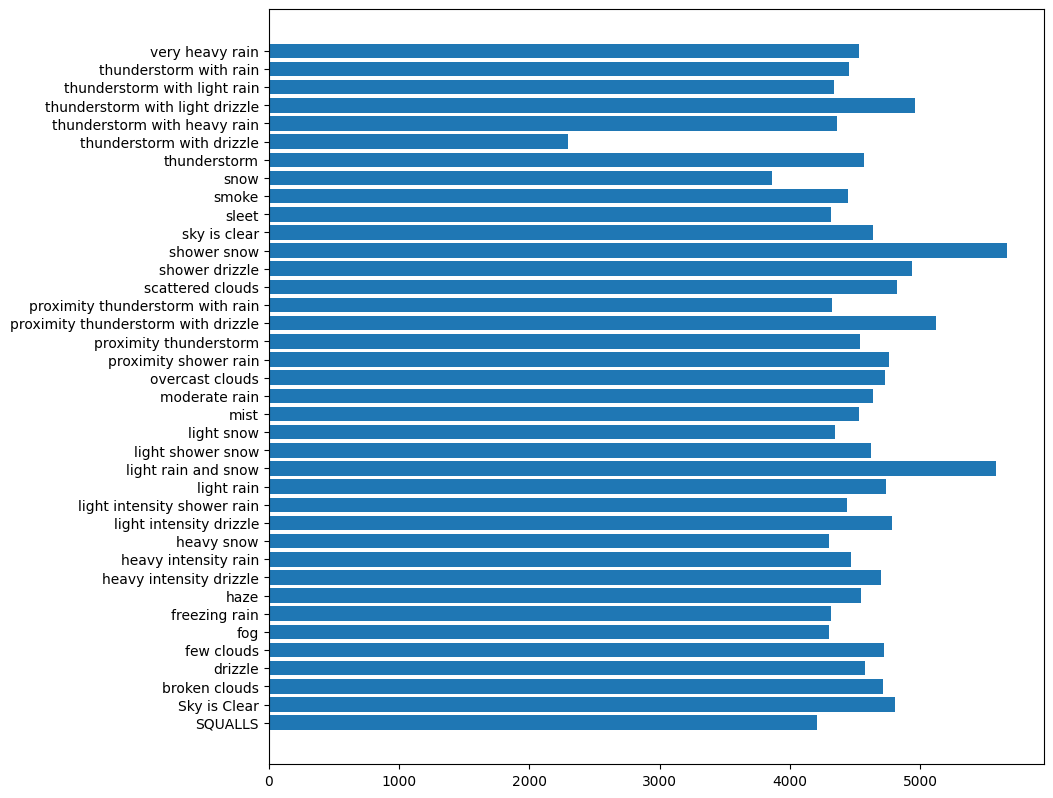

In [33]:
plt.figure(figsize=(10,10))

plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle
- It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

### Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
-The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle